In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Fonction pour créer une exponentielle en fonction de la température en keV
def exponential_spectrum(x_range, T_keV):
    """
    Calcule un spectre exponentiel pour une température donnée en keV.
    """
    return np.exp(-x_range / T_keV)

# Fonction pour combiner les 2 exponentielles avec un facteur de pondération alpha
def double_exponential_spectrum(x_range, T1_keV, T2_keV, alpha):
    """
    Combine deux spectres exponentiels avec des températures différentes et un facteur de pondération.
    """
    # Exponentielles pour les deux températures
    I1 = exponential_spectrum(x_range, T1_keV)
    I2 = exponential_spectrum(x_range, T2_keV)
    
    # Combinaison des deux spectres avec la pondération
    return alpha * I1 + (1 - alpha) * I2

def normalize_spectrum(lambda_range, spectrum):
    """
    Normalise le spectre en le divisant par son intégrale.
    """
    # Calcul de l'intégrale du spectre en utilisant la règle des trapèzes
    integral = np.trapz(spectrum, lambda_range)
    
    # Normalisation : diviser le spectre par l'intégrale pour que l'aire soit 1
    return spectrum / integral


# Paramètres
x_range = np.linspace(0, 5, 500)

# Bornes pour les valeurs aléatoires des paramètres
T1_min, T1_max = 0.01, 0.1  # Température 1 en keV
T2_min, T2_max = 0.01, 0.5  # Température 2 en keV
alpha_min, alpha_max = 0.0, 1.0  # Facteur de pondération

# Nombre de spectres à générer
num_spectra = 1000

# Liste pour stocker les spectres et leurs paramètres
spectra_data = []

# Dossier pour enregistrer les spectres
output_dir = "D:/PYTHON/spectra/"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Boucle pour générer et enregistrer les spectres
for i in range(num_spectra):
    # Tirage aléatoire des paramètres dans les bornes spécifiées
    T1_MeV = np.random.uniform(T1_min, T1_max)
    T2_MeV = np.random.uniform(T2_min, T2_max)
    alpha = np.random.uniform(alpha_min, alpha_max)

    # Calcul du spectre combiné avec les valeurs aléatoires des paramètres
    spectrum = double_exponential_spectrum(x_range, T1_MeV, T2_MeV, alpha)

    # Sauvegarder les spectres dans une liste
    spectra_data.append((x, spectrum, T1_MeV, T2_MeV, alpha))

    # Sauvegarder les spectres dans un fichier CSV avec deux formats différents
    spectrum_filename = os.path.join(output_dir, f"spectrum_{i+1}.txt")

    # Format : %.6f pour la première colonne et %d pour la deuxième (entier)
    np.savetxt(spectrum_filename, np.column_stack((x_range, spectrum)), delimiter='\t', header='', comments='', fmt=['%.2f', '%.8f'])



    print(f"Spectre {i+1} généré et sauvegardé sous {spectrum_filename}")

# Exemple de comment accéder à un spectre
# Spectre du premier enregistrement
x, spectrum, T1, T2, alpha = spectra_data[0]

# Tracé du premier spectre sauvegardé
plt.figure(figsize=(8, 5))
plt.plot(x_range, spectrum, label=f"T1={T1:.3f} MeV, T2={T2:.3f} MeV, α={alpha:.2f}")
plt.xlabel("Longueur d'onde (nm)")
plt.ylabel("Intensité (norm.)")
plt.title("Spectre généré et sauvegardé")
plt.legend()
plt.grid()
plt.yscale('log')
plt.show()


NameError: name 'x' is not defined

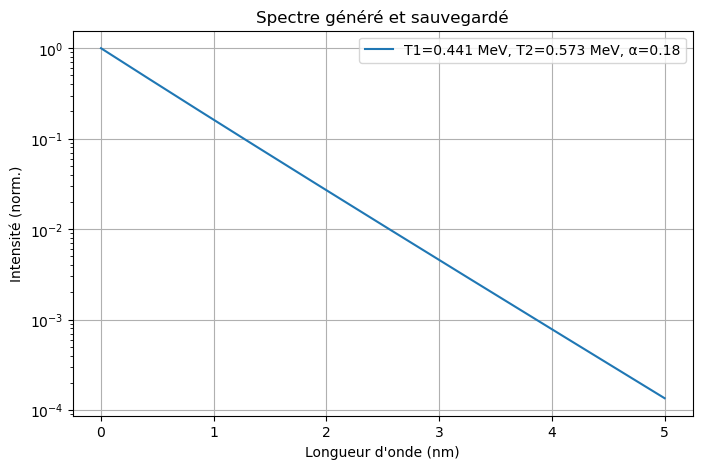

In [89]:
# Exemple de comment accéder à un spectre
# Spectre du premier enregistrement
x, spectrum, T1, T2, alpha = spectra_data[6]

# Tracé du premier spectre sauvegardé
plt.figure(figsize=(8, 5))
plt.plot(x_range, spectrum, label=f"T1={T1:.3f} MeV, T2={T2:.3f} MeV, α={alpha:.2f}")
plt.xlabel("Longueur d'onde (nm)")
plt.ylabel("Intensité (norm.)")
plt.title("Spectre généré et sauvegardé")
plt.legend()
plt.grid()
plt.yscale('log')
plt.show()